# Question 1

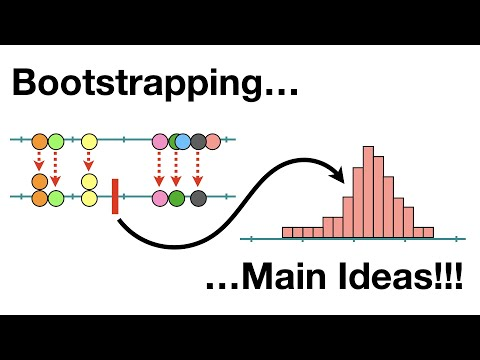

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

The standard error of the mean is different than the standard deviaton of the original data because the standard deviaton of the original data is a figure for how much the actual data deviates from its mean. On the other hand, the standard error of the mean is how far off the sample mean is from the real mean of the data.

# Question 2
We can use the standard error of the mean to create a 95% confidence interval because 95% of the sample means fall within $\pm 1.96$ standard errors of the populatioon mean. This covers 95% of the bootstrapped sample means because it should be the same if the distribution is relatively normal.

# Question 3
One can create a 95% bootstrapped confidence interval using the bootstrapped means by sorting the bootstrapped means in ascending order. Omit everything below the 2.5th percentile. Everything from the 2.5th percentile up to the 97.5th percentile is this 95% bootstrapped confidence interval.

In [ ]:
# Question 4

import numpy as np
import pandas as pd

# Assuming df is a Pandas DataFrame or Series containing the dataset
# If df is a DataFrame, make sure to select the relevant column (e.g., df['column_name'])

# Number of bootstrap samples
n_bootstrap = 10000

# Size of the dataset (number of data points)
n = len(df)

# Array to store the bootstrapped sample means
bootstrap_means = np.empty(n_bootstrap)

# Perform bootstrap sampling
for i in range(n_bootstrap):
    # Resample the data with replacement
    bootstrap_sample = np.random.choice(df, size=n, replace=True)
    # Compute the mean of the bootstrap sample
    bootstrap_means[i] = np.mean(bootstrap_sample)

# Sort the bootstrapped means
bootstrap_means.sort()

# Compute the 2.5th and 97.5th percentiles for the 95% confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Output the confidence interval
print(f"95% bootstrap confidence interval for the mean: [{lower_bound}, {upper_bound}]")

# In order to change the code can be changed to produce a 95% bootstrap confidence interval for different 
# population parameter...

def population_parameter(sample):
    # Replace this with any custom population parameter function
    return np.max(sample)  # For example, to calculate the maximum value

# Perform bootstrap sampling for a custom population parameter
for i in range(n_bootstrap):
    # Resample the data with replacement
    bootstrap_sample = np.random.choice(df, size=n, replace=True)
    # Compute the custom population parameter of the bootstrap sample
    bootstrap_means[i] = population_parameter(bootstrap_sample)

# Compute the 95% confidence interval for the custom parameter
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

print(f"95% bootstrap confidence interval for the custom parameter: [{lower_bound}, {upper_bound}]")


# Question 5

We need to distinguish between the role of the population parameter and the sample sample statistic when it comes to confidence intervals because they represent different things. The population parameter is a set value, one that the statistician does not know. On the contrary, the sample statistic is used to make a hypothesis as to what the population parameter is, when looking at the sample statistics' confidence interval.

# Question 6

### What is the process of bootstrapping?

The process of bootstrapping revolves around grabbing one sample set of data from the entirety of the data and drawing at random, an equivalent amount of data points. By inputting these bootstrapped sample sets as if they were taken 'normally', the result of your data should be relatively accurate, comparatively to the process of taking data from the entirety of the population.

### What is the main purpose of bootstrapping?

The main purpose of bootstrapping is to obtain more consise data regardless of whether or not one can pull data from all of the population that is being analyzed. Using a small data set of this larger population, and reusing it while still resulting in an almost accurate analysis is a very powerful tool, especially if it is a very large population and (near) impossible to obtain every single subject being analyzed.


### If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

You could use boostrapping in this scenario by bootstrapping the sample size a relatively large enough amount of times, depending on the size of the entire population. If the average of the bootstrapped samples was close to your estimate, the hypothesis drawn is plausible. Otherwise, it is not.

# Question 7
  
  A confidence interval overlapping zero fails to reject the null hypothesis when the sample mean statistic is not zero because it simply means that the mean of zero is a plausable concept within the dataset, it does not omit otherwise. To definitively reject the null hypothesis, the confidence interval would have to not overlap zero, completely rejecting this hypothesis.

# link to chatgpt
https://chatgpt.com/share/66fc9bd3-36c8-8007-a5c6-0698b024d94b

# Question 8

In [10]:
import matplotlib.pyplot as plt
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}
df = pd.DataFrame(data)
# print(df)

def mean_difference(data):
    return np.mean(data['FinalHealthScore'] - data['InitialHealthScore'])
n_iterations = 1000
n_size = len(df)
statistics = []
for i in range(n_iterations):
    sample = df.sample(n=n_size, replace=True)
    stat = mean_difference(sample)
    statistics.append(stat)
statistics = np.array(statistics)
    
alpha = 0.95
lower_bound = np.percentile(statistics, ((1 - alpha) / 2) * 100)
upper_bound = np.percentile(statistics, (alpha + ((1 - alpha) / 2)) * 100)

print(f"95% Confidence Interval for the mean difference: {lower_bound:.2f} to {upper_bound:.2f}")


95% Confidence Interval for the mean difference: 0.80 to 5.50


In this context, the null hypothesis of no effect would mean that the final health score minus the initial health score is zero. This would mean that the vaccine has no effect, making the null hypothesis true. Since the code above reads that the confidence interval for the mean distribution of the bootstrapped data of the sample given does not include zero, this opposes the null hypothesis, making it invalid. Below is a visual proof that disproves this hypothesis. The dotted green lines clearly stray away from the red, which holds the mean value of zero (no effect).

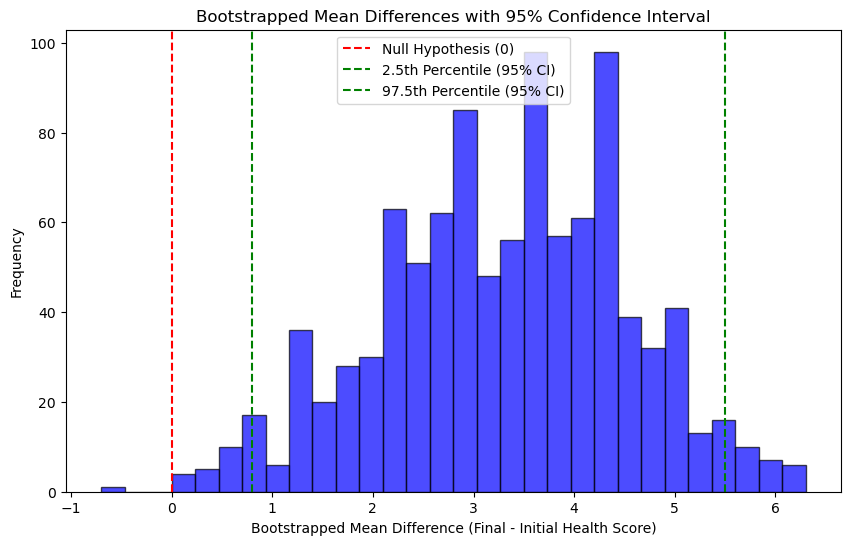

In [13]:
lower_bound = np.percentile(statistics, 2.5)
upper_bound = np.percentile(statistics, 97.5)
plt.figure(figsize=(10, 6))
plt.hist(statistics, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', label='Null Hypothesis (0)')
plt.axvline(x=lower_bound, color='green', linestyle='--', label='2.5th Percentile (95% CI)')
plt.axvline(x=upper_bound, color='green', linestyle='--', label='97.5th Percentile (95% CI)')
plt.xlabel('Bootstrapped Mean Difference (Final - Initial Health Score)')
plt.ylabel('Frequency')
plt.title('Bootstrapped Mean Differences with 95% Confidence Interval')
plt.legend()
plt.show()

# another chatgpt summary- sorry i uploaded a pic so i cant include a link :(

In this conversation, we worked with a dataset containing patient health scores, focusing on comparing the initial and final health scores. Here's a summary of what we covered:

**Dataset Creation:** I helped you turn a CSV-like dataset into a pandas DataFrame.

**Bootstrapping:** We discussed bootstrapping, and I provided Python code to compute the mean difference between initial and final health scores with bootstrapping. I also explained how to estimate the confidence interval from the bootstrapped data.

**Histogram:** I provided code and generated a histogram showing the distribution of both initial and final health scores.

**Null Hypothesis:** We discussed the null hypothesis of no effect, where the null hypothesis assumes no difference between the initial and final health scores (i.e., the difference is 0).

**Visual Disproof:** I explained how to visually disprove the null hypothesis using bootstrapped data by plotting the distribution of mean differences and comparing it to 0, and provided Python code for the plot.

Feel free to revisit anytime! 😄

# Question 9 
yes